In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from scipy.stats import norm


In [2]:
slots = np.array(list(range(1, 37)) + [40, 42])
bet = 1
num_simulation = 100000
spin_counts = [10,25,100,1000]


### Q1:


\begin{align*}

P(B) &= \frac{18}{38} = \frac{9}{19} \approx 0.4737 \\ \\

P(L) &= \frac{20}{38} = \frac{10}{19} \approx 0.5263 \\ \\

\end{align*}


In [3]:
def spin_wheel(N):
    money = 1
    chosen_slots = np.random.choice(slots, N, replace=True)
    wins = np.sum((chosen_slots.astype(int) % 2) == 1)
    money = 2 * wins - N
    return money      

In [4]:
print(spin_wheel(10))

0


### Q2:


\begin{align*}
E[X] &= \frac{9}{19} - \frac{10}{19} = -\frac{1}{19} \approx -0.0526 \\ \\

Var(X) &= E[X^2] - (E[X])^2 \\ \\

E[X^2] &= (1^2 \times P(B)) + (-1^2 \times P(L)) \\ \\

E[X^2] &= (1 \times \frac{9}{19}) + (1 \times \frac{10}{19}) = 1 \\ \\
Var(X) &= 1 - \left(-\frac{1}{19}\right)^2 = 1 - \frac{1}{361} \approx 0.9972 \\ \\
\sigma_X &= \sqrt{Var(X)} \approx \sqrt{0.9972} \approx 0.9986 \\ \\ \\
E[S_{10}] &= 10 \times \left(-\frac{1}{19}\right) \approx -0.5263 \\
E[S_{25}] &= 25 \times \left(-\frac{1}{19}\right) \approx -1.3158 \\
E[S_{100}] &= 100 \times \left(-\frac{1}{19}\right) \approx -5.2632 \\
E[S_{1000}] &= 1000 \times \left(-\frac{1}{19}\right) \approx -52.6316 \\ \\ \\

\sigma_{S_{10}} &= \sqrt{10} \times 0.9986 \approx 3.158 \\
\sigma_{S_{25}} &= \sqrt{25} \times 0.9986 \approx 4.993 \\
\sigma_{S_{100}} &= \sqrt{100} \times 0.9986 \approx 9.986 \\
\sigma_{S_{1000}} &= \sqrt{1000} \times 0.9986 \approx 31.579 




\end{align*}



In [5]:
def monte_carlo_simulation(spin_count, num_simulation):
    bet_results = np.array([spin_wheel(spin_count) for _ in range(num_simulation)])
    return bet_results

Mean and Std Error for 10 spins: -0.5389 and 3.1498


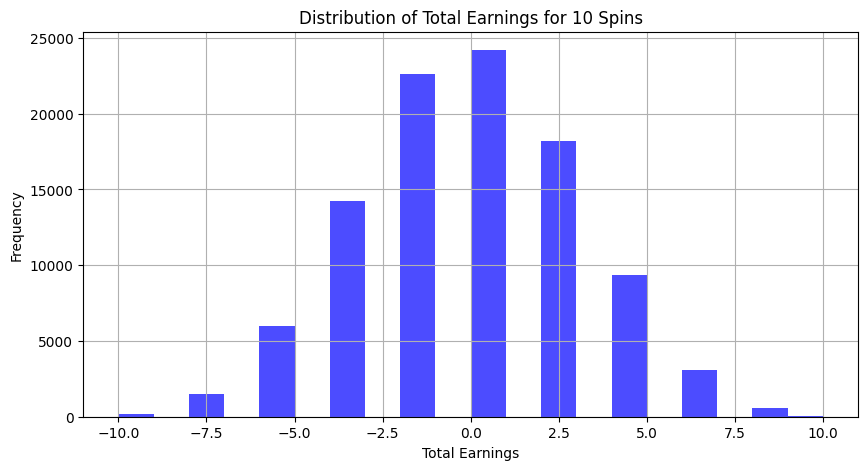

Mean and Std Error for 25 spins: -1.3039 and 5.0105


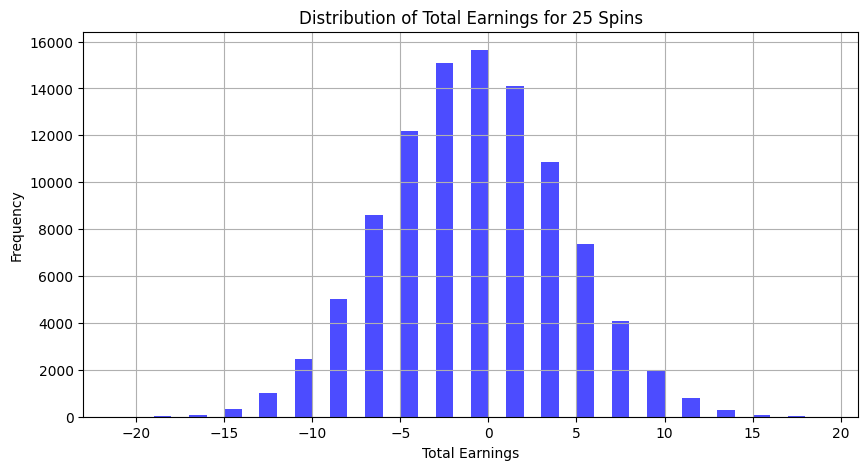

Mean and Std Error for 100 spins: -5.2394 and 9.9705


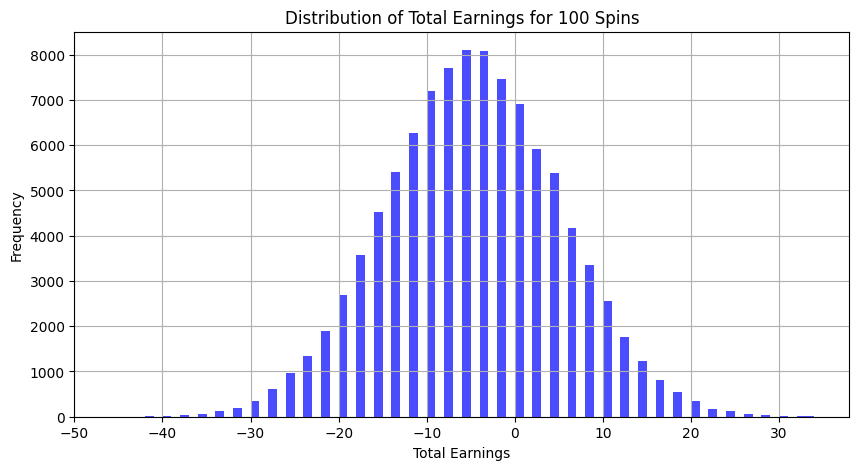

Mean and Std Error for 1000 spins: -52.7536 and 31.6661


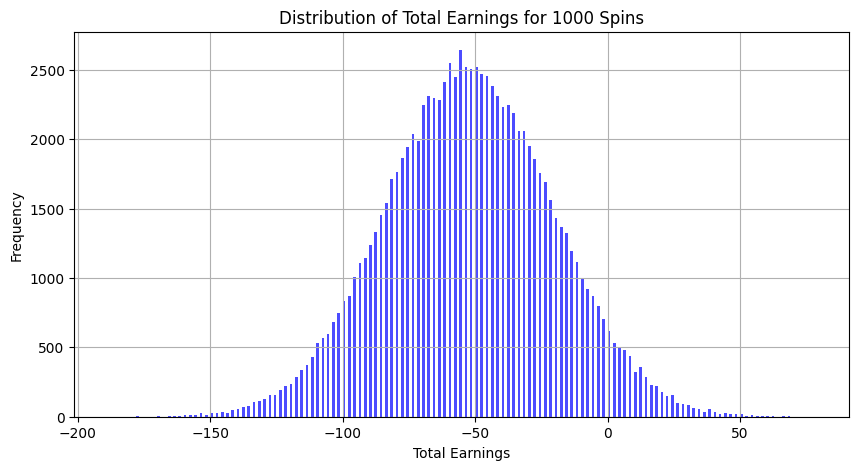

In [6]:
total_earnings = []

for spin_count in spin_counts:
    total_earning = monte_carlo_simulation(spin_count, num_simulation)
    total_earnings.append(total_earning)
    
    mean = np.mean(total_earning)
    std = np.std(total_earning)
    std_error = np.std(total_earning) 

    print(f"Mean and Std Error for {spin_count} spins: {mean:.4f} and {std_error:.4f}")

    bin_width = 1  # Adjust as needed
    num_bins = int((max(total_earning) - min(total_earning)) / bin_width)

    plt.figure(figsize=(10, 5))
    plt.hist(total_earning, bins=num_bins, alpha=0.7, color='blue', histtype='bar', density=False)
    plt.xlabel("Total Earnings")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Total Earnings for {spin_count} Spins")
    plt.grid(True)
    plt.show()




### Q3:


\begin{align*}


E[X] &= (1 \times P(B)) + (-1 \times P(L)) \\ \\

E[X] &= \left(1 \times \frac{9}{19}\right) + \left(-1 \times \frac{10}{19}\right) \\ \\

E[X] &= \frac{9}{19} - \frac{10}{19} = -\frac{1}{19} \approx -0.0526 \\ \\

\end{align*}



Average earnings and Std for 10 spins: -0.0539 and 0.3150


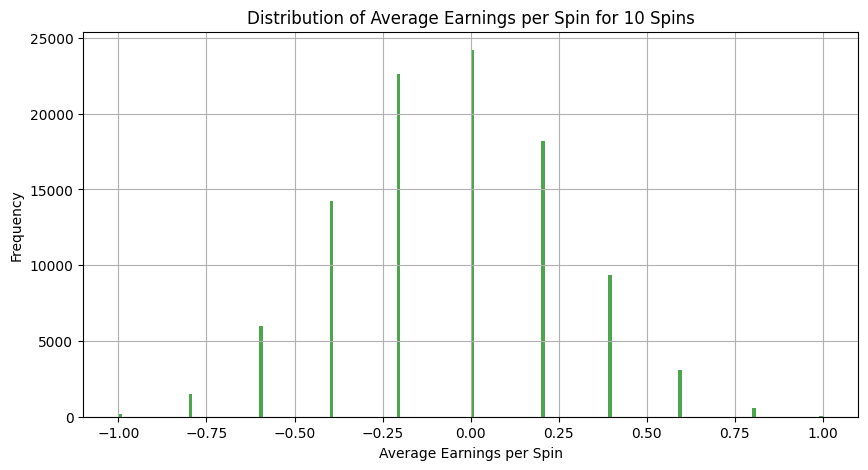

Average earnings and Std for 25 spins: -0.0522 and 0.2004


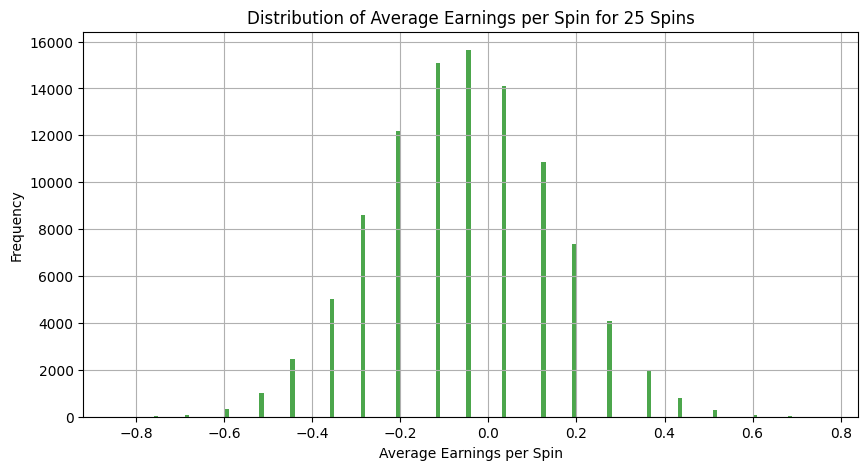

Average earnings and Std for 100 spins: -0.0524 and 0.0997


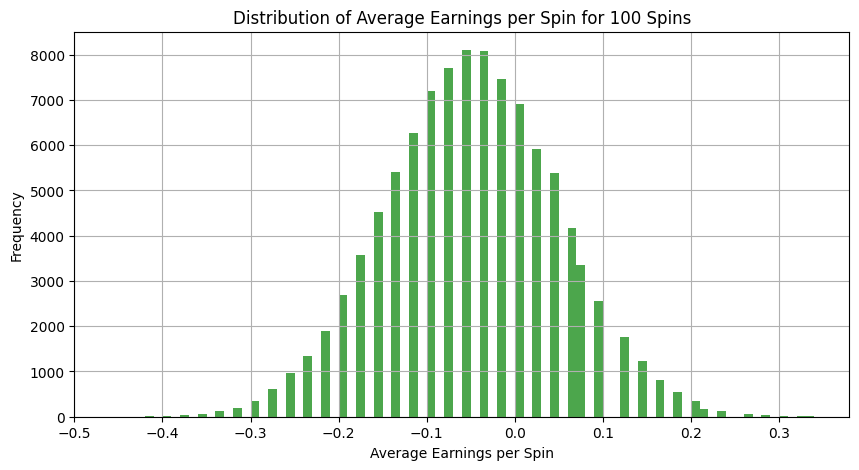

Average earnings and Std for 1000 spins: -0.0528 and 0.0317


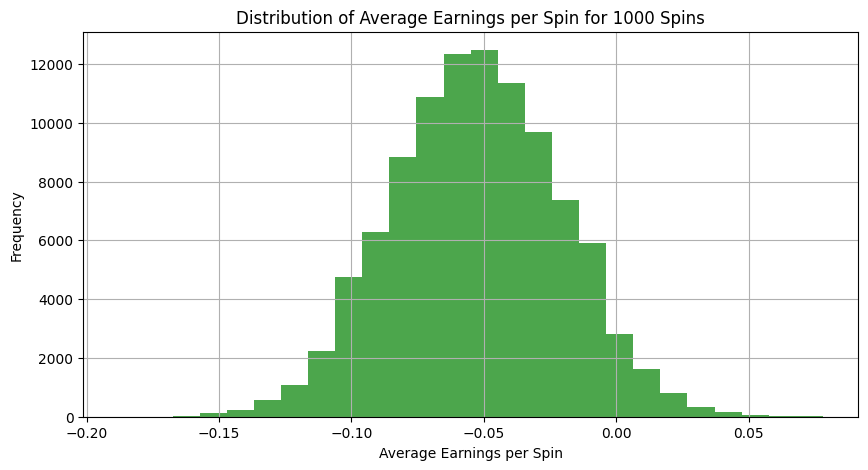

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

average_earnings = [total_earnings[i] / spin_counts[i] for i in range(len(total_earnings))]

for i, average_earning in enumerate(average_earnings):
    mean_avg = np.mean(average_earning)
    std_avg = np.std(average_earning)

    print(f"Average earnings and Std for {spin_counts[i]} spins: {mean_avg:.4f} and {std_avg:.4f}")

    bin_width = 0.01
    
    num_bins = int((max(average_earning) - min(average_earning)) / bin_width)

    plt.figure(figsize=(10, 5))
    plt.hist(average_earning, bins=num_bins, alpha=0.7, color='green', histtype='bar', density=False)
    plt.xlabel("Average Earnings per Spin")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Average Earnings per Spin for {spin_counts[i]} Spins")
    plt.grid(True)
    plt.show()


### Q5:

\begin{align*}
S_n &= \sum_{i=1}^{n} X_i \\  \\
S_n &\sim \mathcal{N}(n\mu, n\sigma^2) \\ \\  
P(S_n > 0) &= P\left( \frac{S_n - n\mu}{\sqrt{n\sigma^2}} > \frac{0 - n\mu}{\sqrt{n\sigma^2}} \right) \\  \\
Z &= \frac{S_n - n\mu}{\sqrt{n\sigma^2}} \sim \mathcal{N}(0,1) \\ \\  
P(S_n > 0) &= P\left( Z > \frac{-n\mu}{\sqrt{n\sigma^2}} \right) \\ \\
P(S_{25} > 0) &= P\left( Z > \frac{-25\left(\frac{-1}{19}\right)}{\sqrt{25 \times 0.9972}} \right) \\ \\
P(S_{25} > 0) &\approx P\left( Z > \frac{25}{19 \times \sqrt{25 \times 0.9972}} \right) \\ \\
P(S_{25} > 0) &\approx 0.396
\end{align*}


### Q6:

In [8]:

mu = -1/19
sigma_squared = 0.9972

n_values = np.arange(25, 1001)

Z_values = (-n_values * mu) / np.sqrt(n_values * sigma_squared)
P_values = 1 - norm.cdf(Z_values)



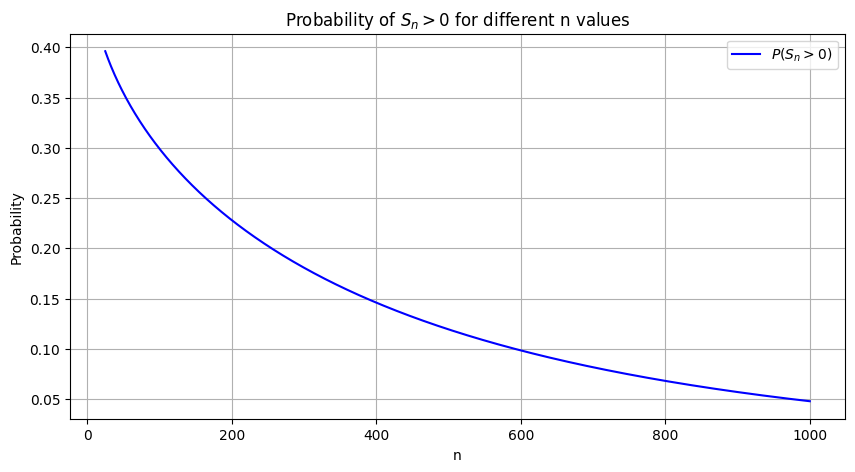

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(n_values, P_values, label="$P(S_n > 0)$", color='b')
plt.xlabel("n")
plt.ylabel("Probability")
plt.title("Probability of $S_n > 0$ for different n values")
plt.legend()
plt.grid()
plt.show()
